In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
N: int = 100*(4+9)

In [3]:
code_1=CmdStanModel(stan_file='code_1.stan')

data = dict(
    N = N,
)

R = 1
code_1_data=code_1.sample(
        data=data,
        iter_sampling=R,
        iter_warmup=0,
        chains=1,
        fixed_param=True,
        seed=20001101,
        refresh=R
        )

INFO:cmdstanpy:compiling stan file /home/Lab6/code_1.stan to exe file /home/Lab6/code_1
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [4]:
code_2=CmdStanModel(stan_file='code_2.stan')

data = dict(
    N = N,
)

R = 1
code_2_data=code_2.sample(
        data=data,
        iter_sampling=R,
        iter_warmup=0,
        chains=1,
        fixed_param=True,
        seed=20001101,
        refresh=R
        )

INFO:cmdstanpy:compiling stan file /home/Lab6/code_2.stan to exe file /home/Lab6/code_2
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
code_1_data.draws_pd().head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.01,0.095184,0.207085,-0.091599,-2.11459,-0.529883,-0.736912,0.60582,...,-0.927864,0.991621,1.65655,0.629696,1.23557,0.938659,-0.007848,0.822246,3.45429,0.908751


In [6]:
code_2_data.draws_pd().head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1291],y[1292],y[1293],y[1294],y[1295],y[1296],y[1297],y[1298],y[1299],y[1300]
0,0.0,0.0,0.095184,0.207085,-0.174531,-1.4248,0.290627,0.032774,0.414139,0.60582,...,1.16552,-0.107545,6.13317,1.07184,1.74957,-1.82562,1.10814,-1.01927,1.8075,-5.59652


In [7]:
x = code_1_data.draws_pd().loc[:,"y[1]":f"y[{N}]"].values

In [8]:
m_1=CmdStanModel(stan_file='code_3.stan')

data = dict(
    N = N,
    y = code_1_data.draws_pd().loc[0,'y[1]':f"y[{N}]"].values,
)

R = 1000
model_1=m_1.sample(
        data=data,
        iter_sampling=R,
        iter_warmup=0,
        chains=1,
        fixed_param=True,
        seed=20001101,
        refresh=R
        )

INFO:cmdstanpy:compiling stan file /home/Lab6/code_3.stan to exe file /home/Lab6/code_3
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_3
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [9]:
model_1.draws_pd().head()

,lp__,accept_stat__,sigma,mu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],log_lik[6],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,0.0,0.0,4.31855,-0.083994,-2.38272,-2.38413,-2.38186,-2.4924,-2.38719,-2.39329,...,-0.298572,-0.402378,8.84000,4.188970,0.239539,-5.451370,0.855891,5.450790,-2.38119,-8.707170
1,0.0,0.0,4.31855,-0.083994,-2.38272,-2.38413,-2.38186,-2.4924,-2.38719,-2.39329,...,-0.744728,-1.213290,-4.82606,-4.310300,4.126480,-0.534642,1.555820,-11.253100,5.30222,0.924537
2,0.0,0.0,4.31855,-0.083994,-2.38272,-2.38413,-2.38186,-2.4924,-2.38719,-2.39329,...,-0.222913,-2.152750,11.08830,0.607701,-0.518219,4.705760,-3.407150,-0.636686,5.34812,-6.486650
3,0.0,0.0,4.31855,-0.083994,-2.38272,-2.38413,-2.38186,-2.4924,-2.38719,-2.39329,...,6.108720,2.252020,7.71031,-0.120676,2.831200,0.822522,2.843550,-4.109870,4.21389,-4.813700
4,0.0,0.0,4.31855,-0.083994,-2.38272,-2.38413,-2.38186,-2.4924,-2.38719,-2.39329,...,-3.050290,-0.254328,-2.80875,4.371140,-3.639330,-3.956750,-0.624041,-1.320510,-2.81646,0.749397


In [10]:
m_2=CmdStanModel(stan_file='code_4.stan')

data = dict(
    N = N,
    y = code_1_data.draws_pd().loc[0,'y[1]':f"y[{N}]"].values,
)

R = 1000
model_2=m_2.sample(
        data=data,
        iter_sampling=R,
        iter_warmup=0,
        chains=1,
        fixed_param=True,
        seed=20001101,
        refresh=R
        )

INFO:cmdstanpy:compiling stan file /home/Lab6/code_4.stan to exe file /home/Lab6/code_4
INFO:cmdstanpy:compiled model executable: /home/Lab6/code_4
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [11]:
model_2.draws_pd().head()

,lp__,accept_stat__,sigma,mu,nu,log_lik[1],log_lik[2],log_lik[3],log_lik[4],log_lik[5],...,y_hat[1291],y_hat[1292],y_hat[1293],y_hat[1294],y_hat[1295],y_hat[1296],y_hat[1297],y_hat[1298],y_hat[1299],y_hat[1300]
0,0.0,0.0,4.31855,-0.083994,0.177226,-3.13832,-3.14753,-3.13264,-3.6093,-3.16701,...,7.463470e+07,36.39510,3.353320e+09,3.787140e+04,-9.75469,-0.790418,-3.842020e+01,53.67220,0.698452,75.12410
1,0.0,0.0,4.31855,-0.083994,0.177226,-3.13832,-3.14753,-3.13264,-3.6093,-3.16701,...,-3.488770e+02,900.48100,5.927030e+01,2.109030e+06,-7.64909,-0.716563,2.858690e+00,199199.00000,-287.886000,4.23850
2,0.0,0.0,4.31855,-0.083994,0.177226,-3.13832,-3.14753,-3.13264,-3.6093,-3.16701,...,-8.829750e+03,-14.64830,-2.332870e+03,6.519590e+01,611506.00000,-11198.700000,2.210780e+00,-226.57900,-2019.940000,-28.45180
3,0.0,0.0,4.31855,-0.083994,0.177226,-3.13832,-3.14753,-3.13264,-3.6093,-3.16701,...,1.128050e+05,-1.37863,4.981130e+00,-1.697830e+00,-5.75976,225.361000,3.732070e+06,1.53358,-2044.180000,-26.70780
4,0.0,0.0,4.31855,-0.083994,0.177226,-3.13832,-3.14753,-3.13264,-3.6093,-3.16701,...,-2.967200e+00,1.52172,1.322490e+05,-6.107780e+02,-186828.00000,-2.077110,1.798360e+03,-148.33000,1.652130,2.75381


In [20]:
fit_1 = az.from_cmdstanpy(posterior=model_1)

fit_2 = az.from_cmdstanpy(posterior=model_2)

In [22]:
fit_1

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [23]:
fit_2

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [32]:
loo_comparison = az.compare({"model_normal": fit_1, "model_chi": fit_2}, ic="loo", scale="deviance")
aic_comparison = az.compare({"model_normal": fit_1, "model_chi": fit_2}, ic="waic", scale="deviance")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


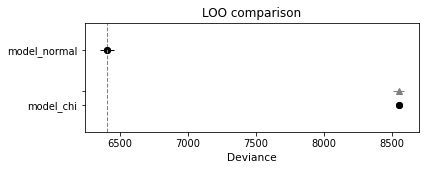

In [33]:
az.plot_compare(loo_comparison)
plt.title("LOO comparison")
plt.show()


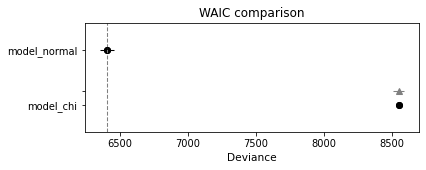

In [34]:
az.plot_compare(aic_comparison)
plt.title("WAIC comparison")
plt.show()

Remarks: the best model is normal one (as it has the lowest deviance).

In [46]:
multi_predictor = CmdStanModel(stan_file="code_5.stan")

results = []
for i in range(1, 4):
    data = dict(
        N = N,
        K = i,
        y = code_2_data.draws_pd().loc[0,f"y[1]":f"y[{N}]"].values,
        X = code_2_data.draws_pd().loc[:, 'X[1,1]':f'X[{N},{i}]'].values.reshape((N,i))
    )
    R = 1000
    sample=multi_predictor.sample(
            data=data,
            iter_sampling=R,
            iter_warmup=0,
            chains=1,
            fixed_param=True,
            seed=20001101,
            refresh=R
            )
    results.append(sample)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [47]:
for i in range(1, 4):
    fit = az.from_cmdstanpy(posterior=results[i-1])
    print(f"Model with {i} predictors")
    print(az.loo(fit, pointwise=True))
    print()

Model with 1 predictors
Computed from 1000 by 1300 log-likelihood matrix

         Estimate       SE
elpd_loo -3335.10     9.85
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1300  100.0%




/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Model with 2 predictors
Computed from 1000 by 1300 log-likelihood matrix

         Estimate       SE
elpd_loo -3432.94    13.68
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1300  100.0%




/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Model with 3 predictors
Computed from 1000 by 1300 log-likelihood matrix

         Estimate       SE
elpd_loo -3436.53    13.45
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad) 1300  100.0%




/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [51]:
loo_comparison = az.compare({"model_1": results[0], "model_2": results[1], "model_3": results[2]}, ic="loo", scale="deviance")
aic_comparison = az.compare({"model_1": results[0], "model_2": results[1], "model_3": results[2]}, ic="waic", scale="deviance")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

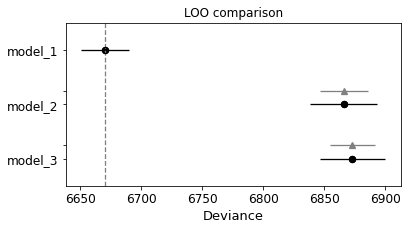

In [52]:
az.plot_compare(loo_comparison)
plt.title("LOO comparison")
plt.show()

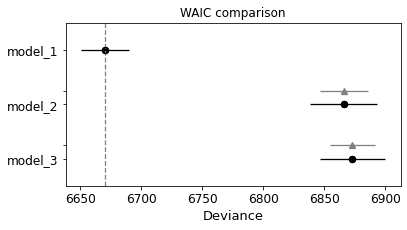

In [53]:
az.plot_compare(aic_comparison)
plt.title("WAIC comparison")
plt.show()

Remarks: one parameter model seems to perform best, as the deviance is the lowest.